# Animal Sound Classification

* Rajanbir Singh Sethi (101413692)
* Sarthak Taneja (101394349)

## Introduction
This project aims to develop an ANN-based system to detect the sounds of various animals in different environments. The system will be trained on a large dataset of animal sounds collected from various sources, including zoos, wildlife sanctuaries, and natural habitats. The ANN will be designed to learn the features that are unique to different species and their environments, enabling it to distinguish between different animal sounds accurately.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from scipy import signal
from scipy.io import wavfile
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import librosa
import IPython.display as ipd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



## Dataset Information

The dataset contains animal sounds. This data consisting of 875 animal sounds contains 10 types of animal sounds. This animal sounds dataset consists 200 cat, 200 dog, 200 bird, 75 cow, 45 lion, 40 sheep, 35 frog, 30 chicken, 25 donkey, 25 monkey sounds.

https://github.com/YashNita/Animal-Sound-Dataset

## EDA

In [2]:
filepath = '/kaggle/input/animal-sound-dataset/Animal-Sound-Dataset-master/Aslan/aslan_23.wav'
ipd.Audio(filepath)

### Loading Audio File with Librosa
Librosa will return us with sample rate and a 2D array

<Figure size 1200x500 with 0 Axes>

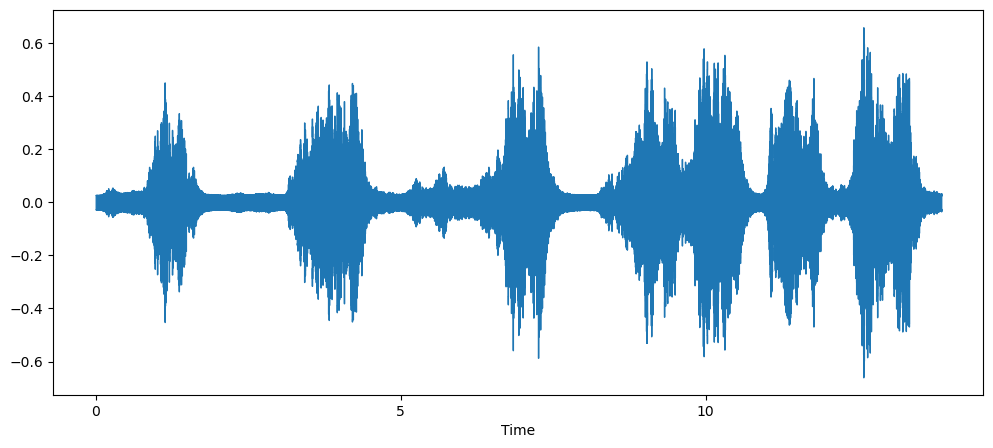

In [3]:
data, sample_rate = librosa.load(filepath)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(data, sr=sample_rate)


In [4]:
print(sample_rate)


22050


Duration of Audio in Seconds 13.86249433106576
Duration of Audio in Minutes 0.23104157218442933


Text(0.5, 0, 'Time [s]')

Text(0, 0.5, 'Amplitude')

Text(0.5, 1.0, '.wav')

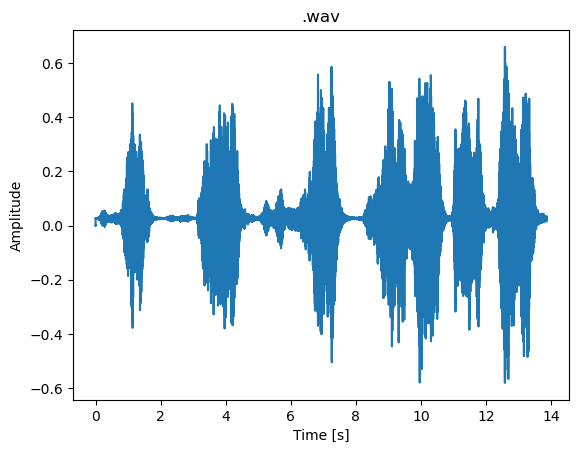

In [5]:
# Duration of the audio in Seconds
duration = len(data)/sample_rate
print("Duration of Audio in Seconds", duration)
print("Duration of Audio in Minutes", duration/60)

time = np.arange(0,duration,1/sample_rate)

# Plotting the Graph using Matplotlib
plt.plot(time,data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('.wav')
plt.show()

#### In the above grpah horizontal lines are silences in Audio which can be removed

Using librosa trim to reduce silences but we can see it isn't much effective as there is ony 0.1 seconds of time reduced

<Figure size 1200x500 with 0 Axes>

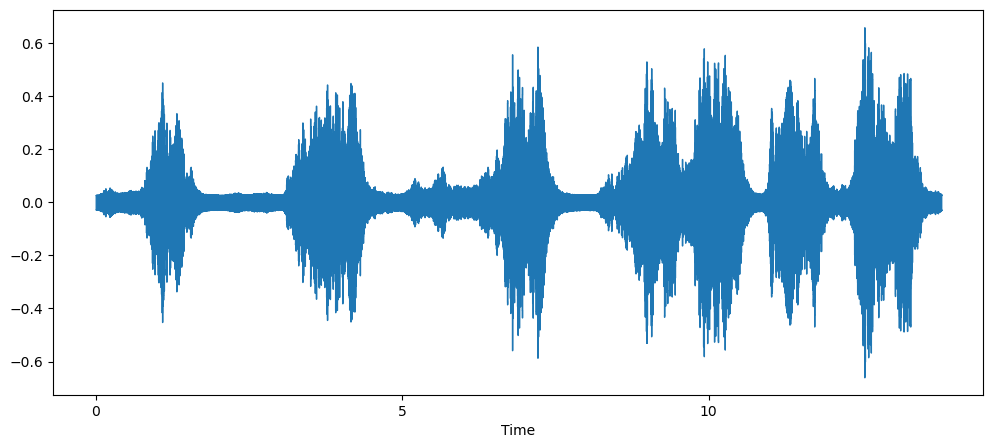

In [6]:
data_ = librosa.effects.trim(data, top_db = 20)[0]
plt.figure(figsize=(12, 5))
librosa.display.waveshow(data_, sr=sample_rate)

frequencies, times, spectrogram = signal.spectrogram(data, sample_rate)

## MFCC
MFCC summarizes the frequency distribution across the window size. So, it is possible to analyze both the frequency and time characteristics of the sound. This audio representation will allow us to identify features for classification. So, it will try to convert audio into some kind of features based on time and frequency characteristics that will help us to do classification.

Applying MFCC on a single file we were using earlier

In [7]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)
print(mfccs)

(40, 598)
[[-4.03697021e+02 -4.42765869e+02 -5.18016541e+02 ... -4.33974701e+02
  -4.16823822e+02 -3.87627869e+02]
 [ 1.10687996e+02  9.01964111e+01  2.75899811e+01 ...  1.15667603e+02
   1.19436310e+02  1.19059761e+02]
 [ 1.91422596e+01  3.00402565e+01  1.95853233e+01 ...  3.65896530e+01
   3.08111134e+01  1.74566841e+01]
 ...
 [ 2.73118210e+00  4.21437454e+00  6.92538500e+00 ... -7.65353680e-01
   6.39073670e-01  2.00093508e-01]
 [ 6.65302128e-02 -4.37986195e-01  5.81415367e+00 ... -2.68305349e+00
   3.01426828e-01  1.90988016e+00]
 [ 9.08289075e-01  1.77748823e+00  7.93432474e+00 ...  8.69063616e-01
   1.79559159e+00  3.74403620e+00]]


#### Creating a function to take input of different wav files and then using librosa we we’ll find MFCC for the audio data, And to find out scaled features, we’ll find the mean of the transpose of an array.

In [8]:
def features_extractor(file):
    #load the file (audio)
    audio, sample_rate = librosa.load(file) 
    #trimming audio using librosa
    audio = librosa.effects.trim(audio, top_db = 20)[0]
    #we extract mfcc
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #in order to find out scaled feature we do mean of transpose of value
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

#### Iterating through each and every audio file and extracting features using tqdm library for tracking

In [9]:
X = []
y = []#contans utterences of words

### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for dirname, _, filenames in os.walk('/kaggle/input/animal-sound-dataset/Animal-Sound-Dataset-master/'):
    for filename in filenames:
        if dirname.split('/')[-1]:
            data=features_extractor(dirname+'/'+filename)
            extracted_features.append([data,filename.split('_')[0]])
            frequencies, times, spectrogram = signal.spectrogram(data, sample_rate)
            
            X.append(spectrogram)
            y.append(dirname.split('/')[-1])


/opt/conda/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 40, using nperseg = 40
  .format(nperseg, input_length))
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/opt/conda/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 40, using nperseg = 40
  .format(nperseg, input_length))
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  This is separate from the ipyk

### Creating a df for Spectogram Extracted features

In [10]:
spectogram_df = pd.DataFrame({'Feature':X, 'Class':y})
spectogram_df

,Feature,Class
0,"[[0.026051987], [0.01129699], [0.004305563], [...",Aslan
1,"[[0.0024794778], [0.0029069793], [0.009764049]...",Aslan
2,"[[0.00031469174], [0.00488169], [0.012867163],...",Aslan
3,"[[0.0006192176], [0.0014113352], [0.02058184],...",Aslan
4,"[[4.9361104e-05], [0.016614726], [0.012328451]...",Aslan
...,...,...
870,"[[0.006142905], [0.013306679], [0.003428847], ...",Esek
871,"[[0.027484039], [0.054118894], [0.010305774], ...",Esek
872,"[[0.0008548477], [0.016651781], [0.0015668425]...",Esek
873,"[[0.0011712873], [0.017205], [0.0014598232], [...",Esek


### Converting X and y to np array and reshaping for convolution

In [11]:
X = np.array(X)
print(X.shape)
X = X.reshape(X.shape + (1,))
print(X.shape)

(875, 21, 1)
(875, 21, 1, 1)


### Using NLTK to analyze the number of classes

Visaulizing the same in the stack chart below

num labels  13


<Figure size 1200x1500 with 0 Axes>

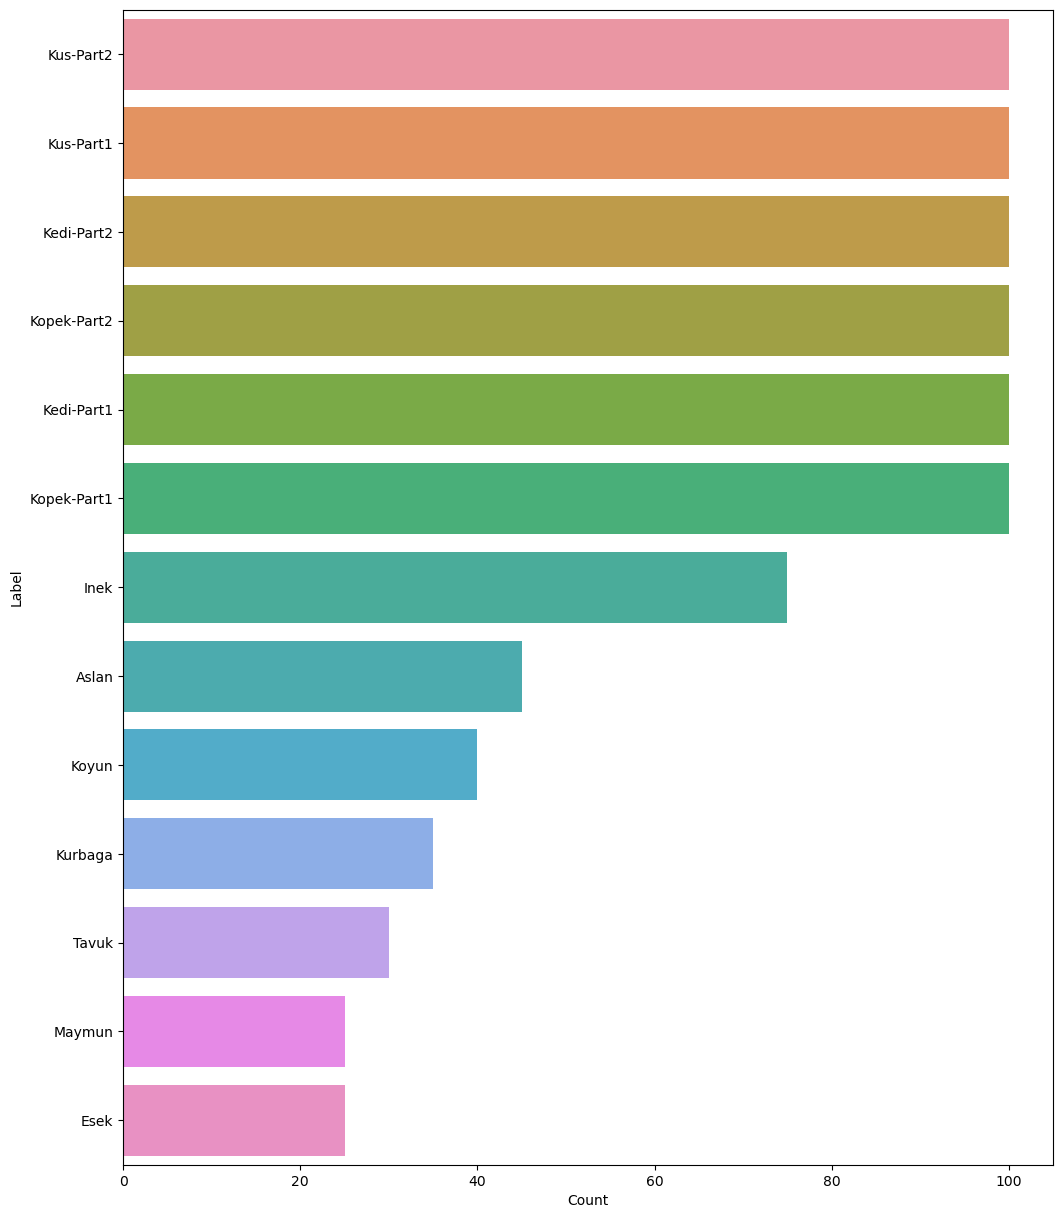

In [12]:
all_labels = nltk.FreqDist(y)#count of all no. of audio utterances in each file
# all_labels contains dictionary having utterences of each word
all_labels_df = pd.DataFrame({'Label': list(all_labels.keys()), 'Count': list(all_labels.values())})
# all_labels_df contains two columns of label and count
num_labels = len(all_labels)
print('num labels ',num_labels)
g = all_labels_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15))
ax = sns.barplot(data=g, x= "Count", y = "Label")

## Approach using MFCC with ANN

### Extracted Features from MFCC 

In [13]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df


,feature,class
0,"[-320.6197, 170.0165, 0.54228926, -4.4358487, ...",aslan
1,"[-102.68324, 162.40454, -11.661325, 13.298295,...",aslan
2,"[-145.35484, 194.07797, -55.129234, 41.18632, ...",aslan
3,"[-135.93217, 206.6159, -81.10366, 43.470753, -...",aslan
4,"[-175.40413, 178.1454, -10.043755, 28.48941, 6...",aslan
...,...,...
870,"[-146.6442, 97.57737, -49.963474, 12.189556, -...",esek
871,"[-204.85785, 142.58203, -136.27072, -6.5969653...",esek
872,"[-163.56732, 180.93925, -65.79712, 16.374146, ...",esek
873,"[-173.92812, 184.55606, -59.260426, 8.032582, ...",esek


### Label Encoding the extracted features from mfcc

In [14]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())
animal_classes = extracted_features_df['class']
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

X = X.reshape(X.shape + (1,))
print(X.shape)
print(y.shape)

(875, 40, 1)
(875, 10)


### Train, Test and Validation Splits

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_valtest,y_train,y_valtest=train_test_split(X,y,test_size=0.2,random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_valtest,y_valtest,test_size=0.5, random_state=37)
X_train.shape, X_val.shape,X_test.shape, y_train.shape, y_val.shape,y_test.shape


((700, 40, 1), (87, 40, 1), (88, 40, 1), (700, 10), (87, 10), (88, 10))

### Model Creation using ANN

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
# No of classes
num_labels=y.shape[1]
model=Sequential()

# first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

## Model Sumary

In [17]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

### Creating Model Checkpoint
Model Checkpoint is created in order to save best model while model is running with least loss

In [18]:
from keras.callbacks import EarlyStopping
from datetime import datetime 
from tensorflow.keras.callbacks import ModelCheckpoint

epochs = 300
batch_size = 32
callbacks = [
    EarlyStopping(
        monitor='val_accuracy', 
        patience=4,
        mode='max',
        verbose=1)
]
checkpointer = ModelCheckpoint(filepath='./audio_classification.hdf5', verbose=1, save_best_only=True)


## Model Fitting

In [19]:
start = datetime.now()

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/300
16/22 [====================>.........] - ETA: 0s - loss: 55.7090 - accuracy: 0.1230   
Epoch 1: val_loss improved from inf to 5.82524, saving model to ./audio_classification.hdf5
22/22 [==============================] - 5s 16ms/step - loss: 48.4300 - accuracy: 0.1400 - val_loss: 5.8252 - val_accuracy: 0.3750
Epoch 2/300
17/22 [======================>.......] - ETA: 0s - loss: 21.1067 - accuracy: 0.2353
Epoch 2: val_loss improved from 5.82524 to 2.25310, saving model to ./audio_classification.hdf5
22/22 [==============================] - 0s 6ms/step - loss: 20.0867 - accuracy: 0.2386 - val_loss: 2.2531 - val_accuracy: 0.3523
Epoch 3/300
17/22 [======================>.......] - ETA: 0s - loss: 11.8237 - accuracy: 0.2941
Epoch 3: val_loss improved from 2.25310 to 1.71458, saving model to ./audio_classification.hdf5
22/22 [==============================] - 0s 6ms/step - loss: 11.6357 - accuracy: 0.2814 - val_loss: 1.7146 - val_accuracy: 0.3750
Epoch 4/300
17/22 [===============

In [20]:
Validation_accuracy=model.evaluate(X_val,y_val,verbose=0)
print(Validation_accuracy[1])

0.7356321811676025


In [21]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8181818127632141


### Functions to plot training and validation accuracy and loss curves
 

In [22]:
loss_start_epoch = 0
for i in range(1, len(history.history['loss'])):
    if history.history['loss'][i] > history.history['loss'][i-1]:
        loss_start_epoch = i
        break
        
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.axvline(x=loss_start_epoch, color='red', linestyle='--')  # Plot line for loss start epoch
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()
    
def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')
    plt.show()

## Plotting training and validation loss curves

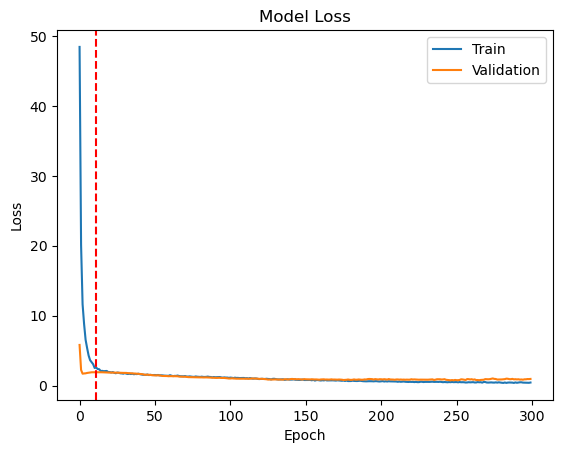

In [23]:
plot_loss(history)

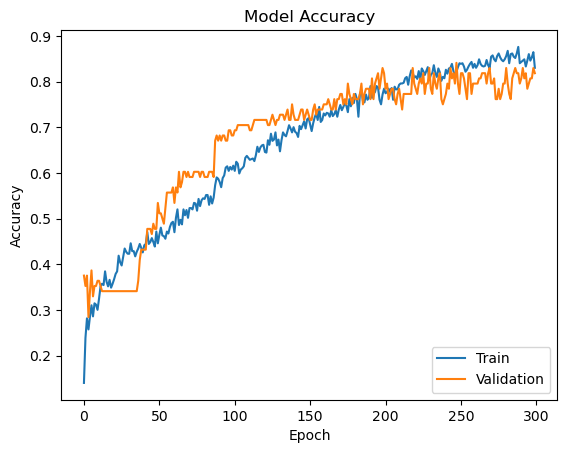

In [24]:
plot_accuracy(history)

##### We can see training accuracy is slightly falling below the validation accuracy, therfore 200 can be defined as a stopping period for model to get best accuracy and least loss

In [25]:
#model.predict_classes(X_test)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

3/3 [==============================] - 0s 3ms/step
[2 8 4 2 2 5 2 2 3 1 2 7 2 2 2 2 5 0 3 2 2 0 3 1 2 3 5 5 0 4 2 3 0 2 2 2 0
 5 3 2 3 2 3 3 0 2 0 3 0 5 3 0 2 3 0 3 9 3 0 0 0 2 3 4 2 7 4 5 9 2 2 0 6 2
 2 1 0 2 2 5 0 0 2 0 7 2 3 0]


## Improved ANN Model

In this model, we have increased the size of the first and second hidden layers to 128 and 256, respectively. We have also added an early stopping callback to avoid overfitting. Additionally, we have used the Adam optimizer with a learning rate of 0.001.

In [26]:
# No of classes
num_labels = y.shape[1]

model = Sequential()

# first layer
model.add(Dense(128, input_shape=(40,), activation='relu'))
model.add(Dropout(0.5))

# second layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# third layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# final layer
model.add(Dense(num_labels, activation='softmax'))


In [27]:
# Compile the model with appropriate optimizer, loss and metrics
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Early stopping callback to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

checkpointer_improved = ModelCheckpoint(filepath='./audio_classification_improved.hdf5', verbose=1, save_best_only=True)

# Fit the model with the training data and validate using the validation data
history_improved = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=batch_size, callbacks=[checkpointer_improved])


Epoch 1/200
16/22 [====================>.........] - ETA: 0s - loss: 36.7553 - accuracy: 0.1504 
Epoch 1: val_loss improved from inf to 5.48896, saving model to ./audio_classification_improved.hdf5
22/22 [==============================] - 2s 14ms/step - loss: 32.0613 - accuracy: 0.1871 - val_loss: 5.4890 - val_accuracy: 0.3448
Epoch 2/200
16/22 [====================>.........] - ETA: 0s - loss: 17.4130 - accuracy: 0.2207
Epoch 2: val_loss improved from 5.48896 to 2.42541, saving model to ./audio_classification_improved.hdf5
22/22 [==============================] - 0s 6ms/step - loss: 15.6167 - accuracy: 0.2400 - val_loss: 2.4254 - val_accuracy: 0.4368
Epoch 3/200
17/22 [======================>.......] - ETA: 0s - loss: 9.6504 - accuracy: 0.2831 
Epoch 3: val_loss improved from 2.42541 to 1.91291, saving model to ./audio_classification_improved.hdf5
22/22 [==============================] - 0s 6ms/step - loss: 9.2766 - accuracy: 0.2829 - val_loss: 1.9129 - val_accuracy: 0.3793
Epoch 4/20

### Plotting training and validation loss curves

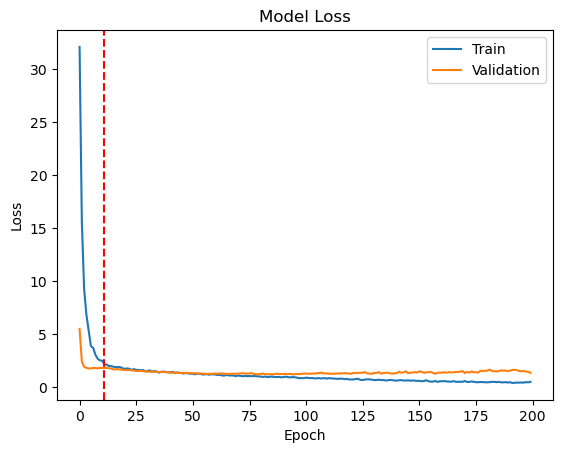

In [28]:
plot_loss(history_improved)

### Plotting training and validation accuracy curves

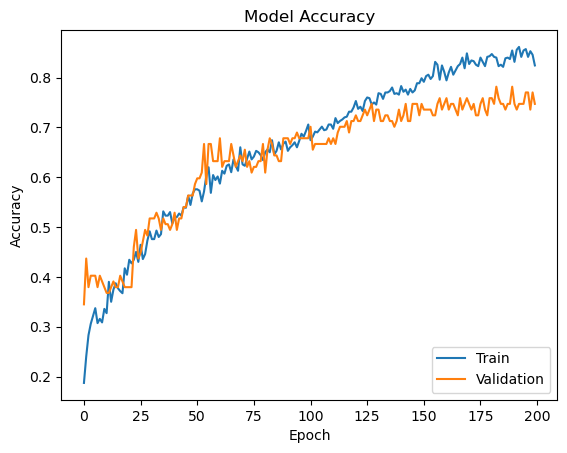

In [29]:
plot_accuracy(history_improved)

#### The improved model has lower number of epochs to achieve stopping period which is around 125 epochs and achieve higher accuracy.

In [30]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8068181872367859


In [31]:
#model.predict_classes(X_test)
y_pred=model.predict(X_test) 
classes_x=np.argmax(y_pred,axis=1)
print(classes_x)

3/3 [==============================] - 0s 3ms/step
[2 8 4 8 2 5 2 2 3 1 2 7 2 2 2 2 5 0 3 2 2 0 3 1 2 3 5 5 0 4 2 3 0 3 8 2 0
 5 3 2 3 2 3 3 0 2 0 3 0 5 3 0 6 3 0 3 9 3 0 0 0 2 0 5 3 7 5 5 3 2 2 0 6 2
 2 1 0 2 2 5 0 0 2 0 2 2 3 0]


## Lets check for a random sound, if the model is able to Identify the class correctly

Testing model performance

In [32]:
filename="/kaggle/input/animal-sound-dataset/Animal-Sound-Dataset-master/Kopek-Part1/dog_13.wav"
#preprocess the audio file
audio, sample_rate = librosa.load(filename) 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
#Reshape MFCC feature to 2-D array
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
#predicted_label=model.predict_classes(mfccs_scaled_features)
x_predict=model.predict(mfccs_scaled_features) 
predicted_label=np.argmax(x_predict,axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
print(prediction_class)

1/1 [==============================] - 0s 95ms/step
[3]
['dog']


In [33]:
animal_classes.unique()

array(['aslan', 'tavuk', 'Kus', 'inek', 'kurbaga', 'koyun', 'cat',
       'maymun', 'dog', 'esek'], dtype=object)

<AxesSubplot:>

Text(0.5, 23.52222222222222, 'Predicted label')

Text(50.722222222222214, 0.5, 'True label')

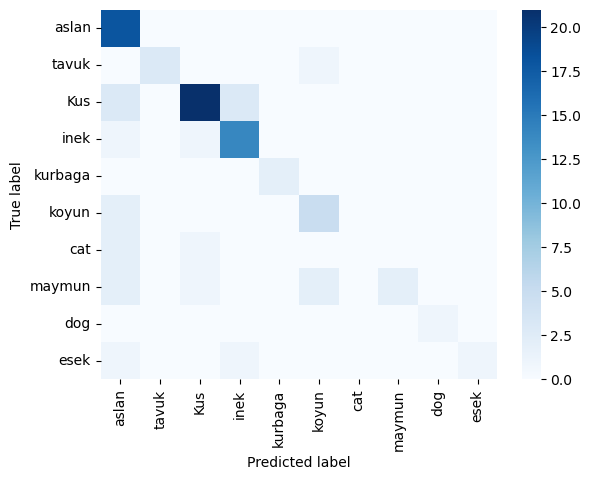

In [34]:
from sklearn.metrics import confusion_matrix

# Convert the predicted labels to binary form
y_pred_binary = (y_pred > 0.5).astype(int)
# Get the true labels for the test data
y_true = y_test.argmax(axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred_binary.argmax(axis=1))

labels = sorted(set(y_true))
sns.heatmap(cm, cmap='Blues', fmt='g', xticklabels=animal_classes.unique(), yticklabels=animal_classes.unique())
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## Creating Classification Report

Used to print recall, precision, accuracy and F1 score.

In [35]:
from sklearn.metrics import classification_report

# Get the predictions
y_pred = model.predict(X_test)

# Convert the predictions from one-hot encoded format to integers
y_pred_int = np.argmax(y_pred, axis=1)

# Get the true labels from the test set
y_true = np.argmax(y_test, axis=1)

report = classification_report(y_true, y_pred_int, target_names=animal_classes.unique(), output_dict=True)
# Print the classification report
print(classification_report(y_true, y_pred_int, target_names=animal_classes.unique()))


3/3 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

       aslan       0.90      1.00      0.95        18
       tavuk       1.00      0.75      0.86         4
         Kus       0.81      0.81      0.81        27
        inek       0.78      0.88      0.82        16
     kurbaga       1.00      1.00      1.00         2
       koyun       0.70      1.00      0.82         7
         cat       0.50      0.33      0.40         3
      maymun       1.00      0.29      0.44         7
         dog       0.33      1.00      0.50         1
        esek       1.00      0.33      0.50         3

    accuracy                           0.81        88
   macro avg       0.80      0.74      0.71        88
weighted avg       0.83      0.81      0.79        88



In [36]:
animal_classes.unique()

array(['aslan', 'tavuk', 'Kus', 'inek', 'kurbaga', 'koyun', 'cat',
       'maymun', 'dog', 'esek'], dtype=object)

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Score')

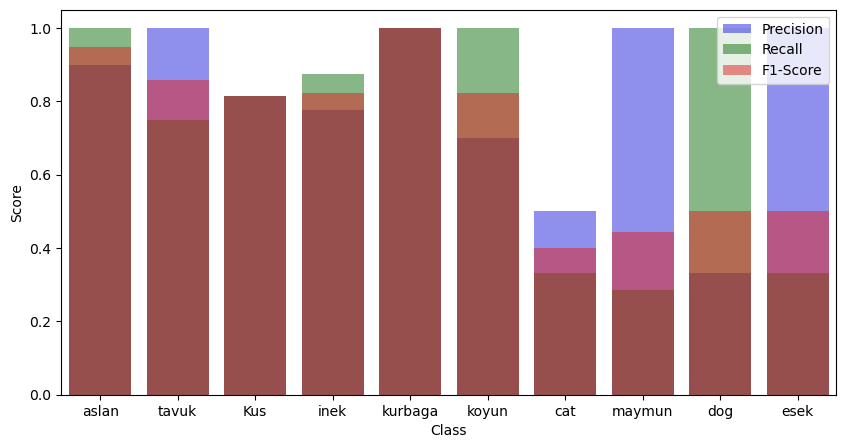

In [37]:

precision = [report[label]['precision'] for label in animal_classes.unique()]
recall = [report[label]['recall'] for label in animal_classes.unique()]
f1_score = [report[label]['f1-score'] for label in animal_classes.unique()]

# plot the values
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=animal_classes.unique(), y=precision, color='b', alpha=0.5, label='Precision')
sns.barplot(x=animal_classes.unique(), y=recall, color='g', alpha=0.5, label='Recall')
sns.barplot(x=animal_classes.unique(), y=f1_score, color='r', alpha=0.5, label='F1-Score')
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.legend()
plt.show()

## Alternative Approach

Alternative approach to improve the classification, we could use CNN for the same and we will pick it up in the following week as we were unable to implement the same in the given time.
<br> We also plan to optimize the model using hyperparameter tuning

## Future Scope

1)Expansion of animal sound library: Adding more animal sounds to the training dataset could improve the system's accuracy and recognition capabilities.

2)Real-time monitoring and analysis: Integrating the system with live audio feeds from field sensors or drones could enable real-time monitoring and analysis of wildlife populations.

3)Integration with acoustic sensors: The system could be integrated with acoustic sensors to automatically trigger audio recording when a target animal sound is detected.

4)Multimodal data analysis: The system could be extended to analyze other types of data such as visual data from cameras or location data from GPS tags to provide a more comprehensive understanding of animal behavior and habitat use.

## References

1. https://asmp-eurasipjournals.springeropen.com/articles/10.1186/s13636-020-00175-3
2.https://www.researchgate.net/publication/329621485_Animal_Sound_Classification_Using_A_Convolutional_Neural_Network
3. https://towardsdatascience.com/cnns-for-audio-classification-6244954665ab
4. https://github.com/YashNita/Animal-Sound-Dataset
5. https://www.analyticsvidhya.com/blog/2022/03/implementing-audio-classification-project-using-deep-learning/
